In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, plot_roc_curve, confusion_matrix, roc_auc_score, plot_confusion_matrix, plot_precision_recall_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression

fileurl = ('https://s3.amazonaws.com/General_V88/boomyeah2015/codingdojo/curriculum/content/chapter/bank_modified.csv')
df = pd.read_csv(fileurl, delimiter=',')
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  4521 non-null   int64
 1   balance              4521 non-null   int64
 2   duration             4521 non-null   int64
 3   campaign             4521 non-null   int64
 4   pdays                4521 non-null   int64
 5   previous             4521 non-null   int64
 6   job_blue-collar      4521 non-null   int64
 7   job_entrepreneur     4521 non-null   int64
 8   job_housemaid        4521 non-null   int64
 9   job_management       4521 non-null   int64
 10  job_retired          4521 non-null   int64
 11  job_self-employed    4521 non-null   int64
 12  job_services         4521 non-null   int64
 13  job_student          4521 non-null   int64
 14  job_technician       4521 non-null   int64
 15  job_unemployed       4521 non-null   int64
 16  job_unknown          452

age                    0
balance                0
duration               0
campaign               0
pdays                  0
previous               0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_married        0
marital_single         0
education_secondary    0
education_tertiary     0
education_unknown      0
default_yes            0
housing_yes            0
loan_yes               0
y_yes                  0
dtype: int64

In [4]:
# Revisamos distribucion
df['y_yes'].value_counts(normalize=True)

0    0.88476
1    0.11524
Name: y_yes, dtype: float64

# Regresion Logistica

In [5]:
# Organizamos data en matrix de caracteristicas, test split, modelo base y data estandarizada
x = df.drop(columns = 'y_yes')
y = df['y_yes']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, stratify = y)


In [7]:
y_test.value_counts(normalize=True)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
parameters = {'penalty': ['l1', 'l2'],
              'C': [0.0001, .001, .01, .1, 1, 10],
              'class_weight': [None, 'balanced']}

In [10]:
log_reg = LogisticRegression(solver = 'liblinear')
# Asignamos a un grid
gridsearch = GridSearchCV(log_reg, parameters, cv = 5)
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2']})

In [14]:
gridsearch.best_params_

{'C': 0.1, 'class_weight': None, 'penalty': 'l1'}

In [16]:
print('Modelo de entrenamiento : ', gridsearch.score(X_train, y_train))
print('Modelo de prueba : ', gridsearch.score(X_test, y_test))

Modelo de entrenamiento :  0.8919089759797725
Modelo de prueba :  0.8865143699336773


In [17]:
# Guardamos predicciones sobre el modelo de prueba
predicts = gridsearch.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


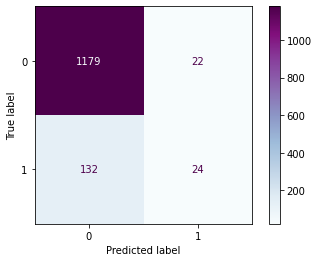

In [23]:
plot_confusion_matrix(gridsearch, X_test, y_test, cmap = 'BuPu', values_format = 'd')

El modelo esta proyectando demasiados ceros

In [24]:
tn, fp, fn, tp = confusion_matrix(y_test, predicts).ravel()
sensibilidad = tp / (tp + fn)

print('Sensibilidad es ', sensibilidad)

especific = tn / (tn + fp)

print('Especificidad es ', especific)

Sensibilidad es  0.15384615384615385
Especificidad es  0.9816819317235637


In [25]:
# AUC ROC y curva
roc_auc_score(y_test, gridsearch.predict_proba(X_test)[:,1])

0.8451504088473281

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


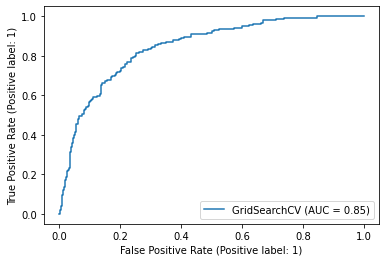

In [26]:
plot_roc_curve(gridsearch, X_test, y_test)

1. ¿Qué métrica será la mejor para evaluar tu modelo de clasificación para este conjunto de datos y por qué? Sugerencia: piensa en lo que significa cada métrica en este escenario específico. ¿Qué métrica va a ayudar más al banco?

Depende el objetivo final del banco, si su estrategia se inclina por métricas de especificidad o de sensibilidad. Si su decisión es especificidad (descartar quienes no se suscribirán a un depósito), podemos optar por el modelo de clasificación; sin embargo, en el caso de sensibilidad obtenemos que nuestro modelo no es el mejor adecuado para decidir la suscripción del cliente al depósito

2. Compara la precisión de tu modelo con el modelo de referencia. ¿Ves algún problema aquí?

El modelo debe mejorar su sensibilidad, es decir, predecir el número de personas que SÍ se suscribirán al depósito

3. ¿De qué otras formas podrías mejorar este modelo?
Normalizar la información (data) para distribuir el set de datos de manera homogénea.